In [1]:
import sys
src_dir = '/Users/palmerio/Science_projects/GRB_population_model/src/'
sys.path.insert(0, src_dir)
from GRB_population import GRBPopulation
import physics as ph
import numpy as np
import io_grb_pop as io
import miscellaneous as msc
from cosmology import init_cosmology
from ECLAIRs import init_ECLAIRs
import plotting_functions as pf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('paper')
import functional_forms as ff


D06_1A nGRB0 : 6.348e-10 yr-1 Mpc-3
D06_2A nGRB0 : 4.905e-10 yr-1 Mpc-3
D06_3A nGRB0 : 1.570e-10 yr-1 Mpc-3
D06_1LN nGRB0 : 3.967e-10 yr-1 Mpc-3
D06_2LN nGRB0 : 3.066e-10 yr-1 Mpc-3
D06_3LN nGRB0 : 9.890e-11 yr-1 Mpc-3
P16 nGRB0 : 1.300e-09 yr-1 Mpc-3


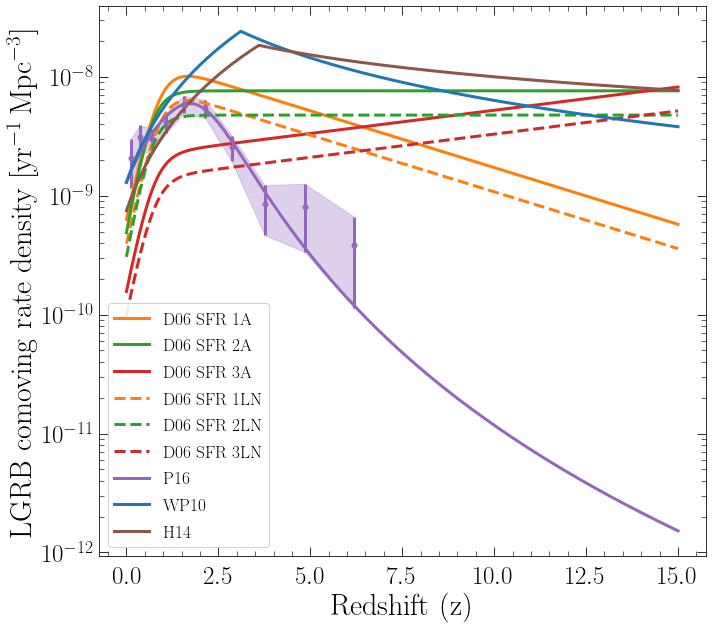

In [4]:
# Adjusting the collapse rate
z = np.linspace(0,15, 1000)
D06_1A = ff.qD06(z, SFR=1, mod='A')
D06_2A = ff.qD06(z, SFR=2, mod='A')
D06_3A = ff.qD06(z, SFR=3, mod='A')
D06_1LN = ff.qD06(z, SFR=1, mod='LN')
D06_2LN = ff.qD06(z, SFR=2, mod='LN')
D06_3LN = ff.qD06(z, SFR=3, mod='LN')

P16 = ff.P16(z)
# SH = ff.SH(z)
# P20 = ff.BExp(z)
WP10 = ff.BPL_z(z)
H14 = ff.BPL_z(z, zm=3.6, a=2.1, b=-0.7, nGRB0=0.75e-9)

print("D06_1A nGRB0 : {:.3e} yr-1 Mpc-3".format(D06_1A[0]))
print("D06_2A nGRB0 : {:.3e} yr-1 Mpc-3".format(D06_2A[0]))
print("D06_3A nGRB0 : {:.3e} yr-1 Mpc-3".format(D06_3A[0]))
print("D06_1LN nGRB0 : {:.3e} yr-1 Mpc-3".format(D06_1LN[0]))
print("D06_2LN nGRB0 : {:.3e} yr-1 Mpc-3".format(D06_2LN[0]))
print("D06_3LN nGRB0 : {:.3e} yr-1 Mpc-3".format(D06_3LN[0]))
print("P16 nGRB0 : {:.3e} yr-1 Mpc-3".format(P16[0]))

fig, ax = plt.subplots(figsize=(10,9))
ax.plot(z, D06_1A, label='D06 SFR 1A', color='C1')
ax.plot(z, D06_2A, label='D06 SFR 2A', color='C2')
ax.plot(z, D06_3A, label='D06 SFR 3A', color='C3')
ax.plot(z, D06_1LN, label='D06 SFR 1LN', ls='--', color='C1')
ax.plot(z, D06_2LN, label='D06 SFR 2LN', ls='--', color='C2')
ax.plot(z, D06_3LN, label='D06 SFR 3LN', ls='--', color='C3')

art, = ax.plot(z, P16, label='P16', color='C4')
# ax.plot(z, SH, label='SH')
# ax.plot(z, P20, label='P20')
ax.plot(z, WP10, label='WP10', color='C0')
ax.plot(z, H14, label='H14', color='C5')
pf.plot_Pescalli_2016_GRB_rate(ax=ax, fmt='.', color=plt.getp(art, 'color'))
ax.legend()
ax.set_yscale('log')
ax.set_xlabel(r'Redshift (z)')
ax.set_ylabel(r'LGRB comoving rate density [$\rm yr^{-1}\,Mpc^{-3}$]')
plt.show()

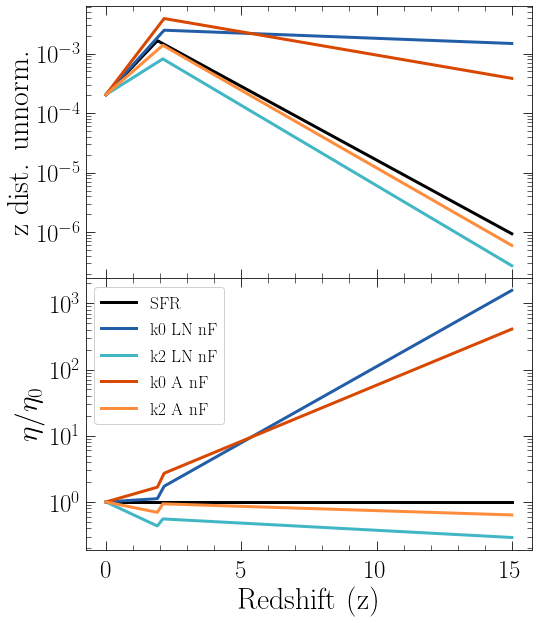

In [11]:
plt.style.use('paper')
colors = ['#225ea8', '#41b6c4', '#d94801', '#fd8d3c']
SFR = ff.BExp(z)
k0_A_nF = ff.BExp(z, a=1.37, b=-0.18, zm=2.15)
k2_A_nF = ff.BExp(z, a=0.91, b=-0.6, zm=2.1)
k0_LN_nF = ff.BExp(z, a=1.16, b=-0.04, zm=2.15)
k2_LN_nF = ff.BExp(z, a=0.66, b=-0.62, zm=2.1)

fig, axes = plt.subplots(2, figsize=(8,10), sharex=True, tight_layout=False)
ax1 = axes[0]
ax2 = axes[1]
ax1.plot(z, SFR, label='SFR', color='k')
ax1.plot(z, k0_LN_nF, label='k0_LN_nF', color=colors[0])
ax1.plot(z, k2_LN_nF, label='k2_LN_nF', color=colors[1])
ax1.plot(z, k0_A_nF, label='k0_A_nF', color=colors[2])
ax1.plot(z, k2_A_nF, label='k2_A_nF', color=colors[3])
ax1.set_yscale('log')
ax1.set_ylabel('z dist. unnorm.')

ax2.plot(z, SFR/SFR, label='SFR', color='k')
ax2.plot(z, k0_LN_nF/SFR, label='k0 LN nF', color=colors[0])
ax2.plot(z, k2_LN_nF/SFR, label='k2 LN nF', color=colors[1])
ax2.plot(z, k0_A_nF/SFR, label='k0 A nF', color=colors[2])
ax2.plot(z, k2_A_nF/SFR, label='k2 A nF', color=colors[3])
ax2.legend(loc='upper left')
ax2.set_yscale('log')
ax2.set_xlabel('Redshift (z)')
ax2.set_ylabel('$\eta/\eta_0$')

fig.subplots_adjust(hspace=0)